In [1]:
# author: Fahim Tajwar

from label_loader import *
from image_loader import *
from util import *
from models import *
from model_trainer import *
from dataset import *

In [2]:
file_name_1 = '../data/labels_cells_only.xlsx'
file_name_2 = '../data/classes_800.xlsx'
file_names = [file_name_1, file_name_2]

label_reader = Label_Reader(file_names)
weight_vector = label_reader.get_weight_vector()
print(label_reader.get_all_labels())
print(label_reader.get_label_to_label_id_map())
print(weight_vector)

{'grows sparse', 'grows dense', 'cell dies'}
{'grows sparse': 0, 'grows dense': 1, 'cell dies': 2}
tensor([0.0097, 0.0294, 0.0260])


In [3]:
prefix = "../data/well2_data/well"
suffix = "_well.png"

all_well_ids = label_reader.get_all_well_ids()
si = Single_Image_Loader(5, all_well_ids, prefix, suffix)
tensor = si.get_image_tensor()
well_id_to_image_id_map = si.get_well_to_image_id_map()
print(tensor.shape)
print(well_id_to_image_id_map)

torch.Size([351, 3, 224, 224])
{1004: 0, 1006: 1, 1015: 2, 1016: 3, 1018: 4, 1019: 5, 1023: 6, 1027: 7, 1036: 8, 1037: 9, 1046: 10, 1055: 11, 1060: 12, 1062: 13, 1063: 14, 1064: 15, 1078: 16, 1086: 17, 1091: 18, 1098: 19, 1100: 20, 1111: 21, 1122: 22, 1125: 23, 1130: 24, 1134: 25, 1141: 26, 1142: 27, 1146: 28, 1153: 29, 1171: 30, 1175: 31, 1176: 32, 1187: 33, 1194: 34, 1233: 35, 1242: 36, 1254: 37, 1265: 38, 1303: 39, 1324: 40, 1327: 41, 1337: 42, 1389: 43, 1416: 44, 1432: 45, 1457: 46, 1460: 47, 1476: 48, 1480: 49, 1516: 50, 1520: 51, 1524: 52, 1569: 53, 1591: 54, 1600: 55, 1607: 56, 1608: 57, 1611: 58, 1614: 59, 1622: 60, 1644: 61, 1646: 62, 1667: 63, 1672: 64, 1679: 65, 1685: 66, 1689: 67, 1693: 68, 1714: 69, 1719: 70, 1733: 71, 1736: 72, 1739: 73, 1754: 74, 1770: 75, 1771: 76, 1772: 77, 1775: 78, 1779: 79, 1784: 80, 1785: 81, 1786: 82, 1791: 83, 1794: 84, 1801: 85, 1804: 86, 1806: 87, 1807: 88, 1811: 89, 1812: 90, 1813: 91, 1815: 92, 1819: 93, 1824: 94, 1825: 95, 1828: 96, 1829: 97

In [4]:
input_size = 3 * 224 * 224
num_classes = 3

label_to_label_id = label_reader.label_to_label_id
label_id_to_label_map = label_reader.get_label_id_to_label_map()
#print(label_id_to_label_map)

Y_label = label_reader.get_label_map()
for key in Y_label:
    Y_label[key] = label_to_label_id[Y_label[key]]

#print(Y_label)

label_id_train, label_id_val, label_id_test = get_dataset_split(Y_label)
print(len(label_id_train))
print(label_id_train)
print(len(label_id_val))
print(len(label_id_train))

280
[ 197 2393 2285  134 1736 1863 1607 1801 2389  709  419  456 2986 1153
  111 1646 2543  753 1958 1233   52 1265  587 1824 2099  623 2942  723
 2866 2122 1900 2344 2800 2023 1918 1098  418 1831 2032 2101  412 1019
 1785 2578  381 2361 2001 1913   76  561  255 1974 1023 1962 1078 1813
  331 1739 1825 1993  413 1967 1569  326  653 2342 1480 2253  677 1176
 1879 2031 1931 1754 2082 2388 1134 2299   68 1775 2147  383 2406 1027
 1141 2227 2424  399 1122 2939  360  739   98  579  206  358 2971 2107
 2337  292 1979  455 1060  128  136  572  434 2046 2346 2351  317 2438
 2857  384 1327 1828  683 1977 1667  269 1100 2397 1142 1015 2368  295
 1771 2820  499  101 1848 1786  121  564 1063 2870  371  451 2862  391
 2135 1146  785 2239 1819 1685  159 2853 1086 2432 2579  702 2810 1004
 1622 2839 1945 2891 1644 2291 1794 1719  286 1893   67  374   91  355
 2569 1476 2199  614 1714  767 1111 2179 1689 1064 1254  389 1853 2684
 2040 2387 1807  536 2029  569 1943  738 2114 1733 1679 2502 1516 1934
  

In [5]:
training_set = Augmented_Dataset(tensor, label_id_train, Y_label, well_id_to_image_id_map, final_transformation_choice)
validation_set = Augmented_Dataset(tensor, label_id_val, Y_label, well_id_to_image_id_map, transform_normalization)
test_set = Augmented_Dataset(tensor, label_id_test, Y_label, well_id_to_image_id_map, transform_normalization)

In [6]:
training_batch_size = 320
validation_batch_size = 1
test_batch_size = 1
learning_rate = 0.0001

validation_loader = torch.utils.data.DataLoader(dataset = validation_set, 
                                          batch_size = validation_batch_size, 
                                          shuffle = False)
test_loader = torch.utils.data.DataLoader(dataset = test_set, 
                                          batch_size = test_batch_size, 
                                          shuffle = False)

In [7]:
logistic_model = LogisticRegression(input_size, num_classes)

In [8]:
model = Model(logistic_model, training_set, training_batch_size, learning_rate, label_id_to_label_map, 
              weight = weight_vector, imbalanced_class = True, num_epochs = 30, verbose = True)

Epoch: [1/30], Loss: 1.1055
Epoch: [2/30], Loss: 1.1007
Epoch: [3/30], Loss: 1.0864
Epoch: [4/30], Loss: 1.0633
Epoch: [5/30], Loss: 1.0783
Epoch: [6/30], Loss: 1.0803
Epoch: [7/30], Loss: 1.0702
Epoch: [8/30], Loss: 1.0554
Epoch: [9/30], Loss: 1.0502
Epoch: [10/30], Loss: 1.0600
Epoch: [11/30], Loss: 1.0511
Epoch: [12/30], Loss: 1.0388
Epoch: [13/30], Loss: 1.0290
Epoch: [14/30], Loss: 1.0343
Epoch: [15/30], Loss: 1.0024
Epoch: [16/30], Loss: 1.0206
Epoch: [17/30], Loss: 1.0219
Epoch: [18/30], Loss: 1.0253
Epoch: [19/30], Loss: 0.9888
Epoch: [20/30], Loss: 1.0060
Epoch: [21/30], Loss: 0.9969
Epoch: [22/30], Loss: 1.0225
Epoch: [23/30], Loss: 0.9878
Epoch: [24/30], Loss: 1.0040
Epoch: [25/30], Loss: 1.0121
Epoch: [26/30], Loss: 0.9875
Epoch: [27/30], Loss: 1.0003
Epoch: [28/30], Loss: 1.0145
Epoch: [29/30], Loss: 0.9848
Epoch: [30/30], Loss: 0.9823
Training done!


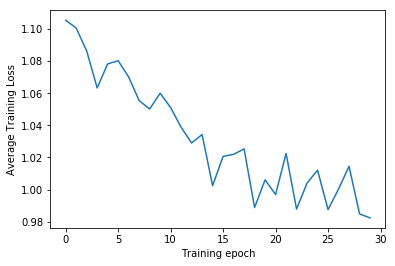

accuracy : 50.000000

Frequency per class:  {'grows sparse': 166, 'cell dies': 63, 'grows dense': 51}


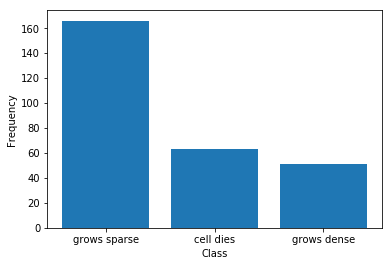

Number of datapoints we got correct per class {'grows sparse': 80, 'cell dies': 36, 'grows dense': 25}
Accuracy per class {'grows sparse': 0.4819277108433735, 'cell dies': 0.5714285714285714, 'grows dense': 0.49019607843137253}


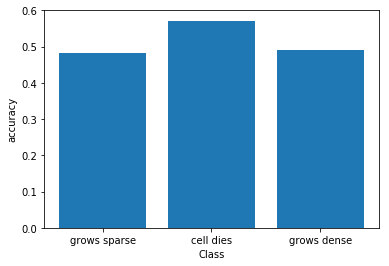

0.13499375653876006

In [9]:
model.train()

accuracy : 54.000000

Frequency per class:  {'grows sparse': 24, 'grows dense': 7, 'cell dies': 4}


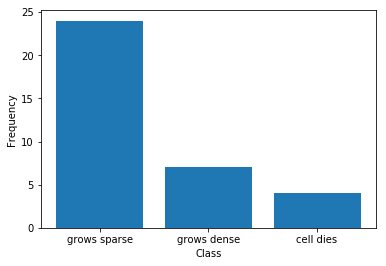

Number of datapoints we got correct per class {'grows sparse': 13, 'grows dense': 5, 'cell dies': 1}
Accuracy per class {'grows sparse': 0.5416666666666666, 'grows dense': 0.7142857142857143, 'cell dies': 0.25}


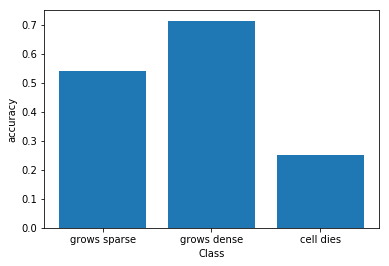

0.09672619047619047

In [10]:
model.test(validation_loader)

accuracy : 48.000000

Frequency per class:  {'grows sparse': 16, 'cell dies': 10, 'grows dense': 9}


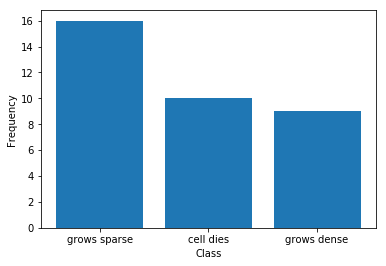

Number of datapoints we got correct per class {'grows sparse': 8, 'cell dies': 6, 'grows dense': 3}
Accuracy per class {'grows sparse': 0.5, 'cell dies': 0.6, 'grows dense': 0.3333333333333333}


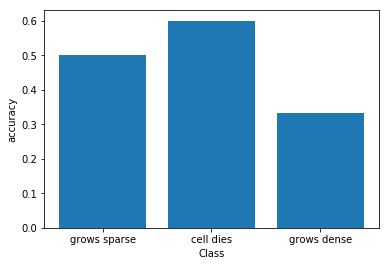

0.09999999999999999

In [11]:
model.test(test_loader)

Training done!
Training done!
Training done!
Training done!
Training done!
accuracy : 48.000000

Frequency per class:  {'grows sparse': 16, 'cell dies': 10, 'grows dense': 9}


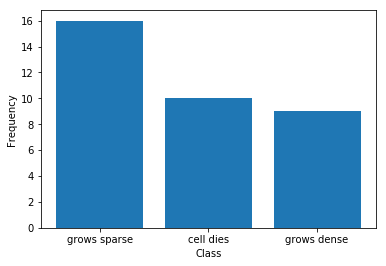

Number of datapoints we got correct per class {'grows sparse': 5, 'cell dies': 8, 'grows dense': 4}
Accuracy per class {'grows sparse': 0.3125, 'cell dies': 0.8, 'grows dense': 0.4444444444444444}


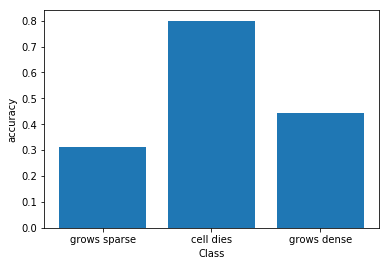

0.1111111111111111

In [12]:
learning_rates = [0.0001, 0.0003, 0.001, 0.003, 0.01]
validater = Hyperparameter_Tuner(logistic_model, training_set, validation_loader, training_batch_size,
                                learning_rates, label_id_to_label_map, weight_vector, True)

best_model = validater.get_best_model()
best_model.test(test_loader)